#  Dynamic Slice
Example of function called when a mouse event occurs in a pad.
When moving the mouse in the canvas, a second canvas shows the
projection along X of the bin corresponding to the Y position
of the mouse. The resulting histogram is fitted with a gaussian.
A "dynamic" line shows the current bin position in Y.
This more elaborated example can be used as a starting point
to develop more powerful interactive applications exploiting CINT
as a development engine.

Note that a class is used to hold on to the canvas that display
the selected slice.




**Author:** Rene Brun, Johann Cohen-Tanugi, Wim Lavrijsen  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:27 AM.</small></i>

In [1]:
import sys

from ROOT import gRandom, gPad, gROOT, gVirtualX
from ROOT import kTRUE, kRed
from ROOT import TCanvas, TH2, TH2F, Double


class DynamicExec:

   def __init__( self ):
      self._cX   = None
      self._cY   = None
      self._old  = None

   def __call__( self ):

      h = gPad.GetSelected();
      if not h:
         return

      if not isinstance( h, TH2 ):
         return

      gPad.GetCanvas().FeedbackMode( kTRUE )

    # erase old position and draw a line at current position
      px = gPad.GetEventX()
      py = gPad.GetEventY()

      uxmin, uxmax = gPad.GetUxmin(), gPad.GetUxmax()
      uymin, uymax = gPad.GetUymin(), gPad.GetUymax()
      pxmin, pxmax = gPad.XtoAbsPixel( uxmin ), gPad.XtoAbsPixel( uxmax )
      pymin, pymax = gPad.YtoAbsPixel( uymin ), gPad.YtoAbsPixel( uymax )

      if self._old != None:
         gVirtualX.DrawLine( pxmin, self._old[1], pxmax, self._old[1] )
         gVirtualX.DrawLine( self._old[0], pymin, self._old[0], pymax )
      gVirtualX.DrawLine( pxmin, py, pxmax, py )
      gVirtualX.DrawLine( px, pymin, px, pymax )

      self._old = px, py

      upx = gPad.AbsPixeltoX( px )
      x = gPad.PadtoX( upx )
      upy = gPad.AbsPixeltoY( py )
      y = gPad.PadtoY( upy )

      padsav = gPad

    # create or set the display canvases
      if not self._cX:
         self._cX = TCanvas( 'c2', 'Projection Canvas in X', 730, 10, 700, 500 )
      else:
         self._DestroyPrimitive( 'X' )

      if not self._cY:
         self._cY = TCanvas( 'c3', 'Projection Canvas in Y', 10, 550, 700, 500 )
      else:
         self._DestroyPrimitive( 'Y' )

      self.DrawSlice( h, y, 'Y' )
      self.DrawSlice( h, x, 'X' )

      padsav.cd()

   def _DestroyPrimitive( self, xy ):
      proj = getattr( self, '_c'+xy ).GetPrimitive( 'Projection '+xy )
      if proj:
         proj.IsA().Destructor( proj )

   def DrawSlice( self, histo, value, xy ):
      yx = xy == 'X' and 'Y' or 'X'

    # draw slice corresponding to mouse position
      canvas = getattr( self, '_c'+xy )
      canvas.SetGrid()
      canvas.cd()

      bin = getattr( histo, 'Get%saxis' % xy )().FindBin( value )
      hp = getattr( histo, 'Projection' + yx )( '', bin, bin )
      hp.SetFillColor( 38 )
      hp.SetName( 'Projection ' + xy )
      hp.SetTitle( xy + 'Projection of bin=%d' % bin )
      hp.Fit( 'gaus', 'ql' )
      hp.GetFunction( 'gaus' ).SetLineColor( kRed )
      hp.GetFunction( 'gaus' ).SetLineWidth( 6 )
      canvas.Update()


if __name__ == '__main__':
 # create a new canvas.
   c1 = TCanvas('c1', 'Dynamic Slice Example', 10, 10, 700, 500 )
   c1.SetFillColor( 42 )
   c1.SetFrameFillColor( 33 )

 # create a 2-d histogram, fill and draw it
   hpxpy  = TH2F( 'hpxpy', 'py vs px', 40, -4, 4, 40, -4, 4 )
   hpxpy.SetStats( 0 )
   x, y = Double( 0.1 ), Double( 0.101 )
   for i in range( 50000 ):
     gRandom.Rannor( x, y )
     hpxpy.Fill( x, y )
   hpxpy.Draw( 'COL' )

 # Add a TExec object to the canvas (explicit use of __main__ is for IPython)
   import __main__
   __main__.slicer = DynamicExec()
   c1.AddExec( 'dynamic', 'TPython::Exec( "slicer()" );' )
   c1.Update()

Welcome to JupyROOT 6.18/03


Draw all canvases 

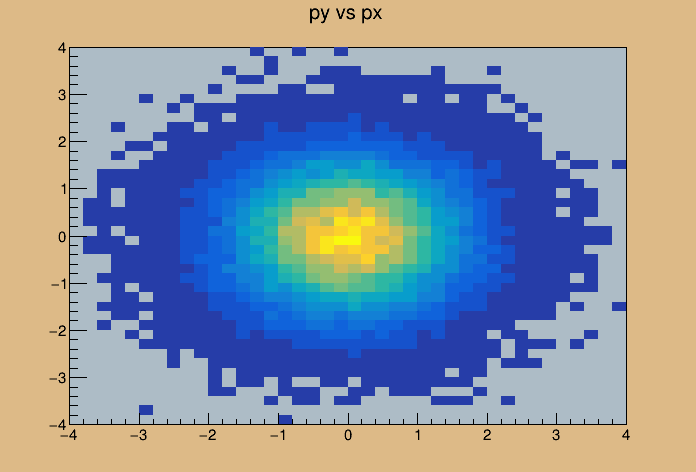

In [2]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()